# Cleaning and Analyzing Employee Exit Surveys
Today I will clean and analyze two datsets of employee exit surveys. My datasets are exit surveys from the Department of Education, Traning and Employment (DETE, dataset <a href="https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey">here</a>) and the Technical and Further Education (TAFE, dataset <a href="https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey">here</a>) institue, both of Queensland, Australia.

I will answer 2 questions using the datasets:
<ul><li>Did short-term employees of the organization resign because of dissatisfaction? How about long-term employees?</li><li>Did younger employees resign because of dissatisfaction? How about older employees?</li></ul>

## Reading the Files
The TAFE survey is saved with an unusual encoding (cp1252). I will use a basic data engineering technique to change the encoding to UTF-8.

In [1]:
import pandas as pd
import csv

dete_survey = pd.read_csv('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 6 | Cleaning and Analyzing Employee Exit Surveys/dete-exit-survey-january-2014.csv')

with open('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 6 | Cleaning and Analyzing Employee Exit Surveys/tafe-employee-exit-survey-access-database-december-2013.csv', encoding='cp1252') as file:
    rows = list(csv.reader(file))

with open('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 6 | Cleaning and Analyzing Employee Exit Surveys/tafe-employee-exit-survey-access-database-december-2013-utf8.csv', mode='w', encoding='utf8') as file:
    writer = csv.writer(file)
    for row in rows:
        writer.writerow(row)
        
tafe_survey = pd.read_csv('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 6 | Cleaning and Analyzing Employee Exit Surveys/tafe-employee-exit-survey-access-database-december-2013-utf8.csv')

In [2]:
dete_survey.shape

(822, 56)

In [3]:
tafe_survey.shape

(702, 72)

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [8]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Data Cleaning (a)
I will initialize my data cleaning by doing 3 things.

1) I will change the "Not Stated" values in the DETE survey to NaN.

2) I will remove columns that are irrelevant to the criteria of my questions (questions of age, dissatisfaction, resignation, and length of employment).

3) I will change the names of the columns in both databases to make them easier to read and work with.

In [10]:
dete_survey = pd.read_csv('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 6 | Cleaning and Analyzing Employee Exit Surveys/dete-exit-survey-january-2014.csv', na_values= 'Not Stated')

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [12]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,788,749.000000,724.000000,817,455,717,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,24,NaN,NaN,15,8,8,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,NaN,NaN,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,NaN,NaN,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,1994.182911,1998.955801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,13.880503,67.792281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,1982.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,1996.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,2007.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

# Some names in the TAFE Columns have hidden characters as a holdover from the cp1252 to UTF-8 encoding change.
# I will include those hidden characters in the names of those columns in the TAFE column renaming dictionary.

tafe_rename_dict = {'Record ID' : 'id',
                    'CESSATION YEAR': 'cease_date',
                    'Reason for ceasing employment': 'separationtype',
                    'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender',
                    'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age',
                    'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',
                    'Classification. \xa0\xa0\xa0\xa0Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(tafe_rename_dict, axis=1, inplace=True)

In [16]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Data Cleaning (b)
I now have the same column names for relevant data in both datasets. However, I still need to do some more data cleaning to include and clean all necessary columns.

1) Now I will select only the employee exit surveys that provided a separation type of "Resignation."

2) I will also clean the date columns in both databases and the length of service columns in the TAFE database.

3) I will also add a corresponding "institute_service" column to the DETE database to correspond to the same in the TAFE database.

In [18]:
print(dete_survey_updated['separationtype'].value_counts(dropna=False))
print(tafe_survey_updated['separationtype'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


In [19]:
dete_resignations_bool = dete_survey_updated['separationtype'].str.contains('Resignation').copy()
dete_resignations = dete_survey_updated[dete_resignations_bool]

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

In [20]:
dete_resignations.shape

(311, 35)

In [21]:
tafe_resignations.shape

(340, 23)

In [22]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [24]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [25]:
def extract_year(date):
    dates = str(date).split('/')
    return dates[-1]

pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case

dete_resignations['cease_date'] = dete_resignations['cease_date'].apply(extract_year).astype('float').copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [27]:
pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case

dete_resignations['institute_service'] = (dete_resignations['cease_date'] - dete_resignations['dete_start_date']).copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

In [28]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Data Cleaning (c)
1) Now I will use columns from each dataset to create a new column called "dissatisfaction" that will indicate if the employee's reason for resigning was dissatisfaction. This column will contain boolean values.

2) Next I will finally combine the datasets and remove the rest of the columns that are of no use in my analysis.

In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
dete_dissatisfaction_columns = ['job_dissatisfaction',
                                'dissatisfaction_with_the_department',
                                'physical_work_environment',
                                'lack_of_recognition',
                                'lack_of_job_security',
                                'employment_conditions',
                                'work_life_balance',
                                'workload']

df = pd.DataFrame()

for col in dete_dissatisfaction_columns:
    df[col] = dete_resignations[col].value_counts(dropna=False)
    
df

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,288,243,284
True,41,29,6,33,14,23,68,27


In [32]:
import numpy as np

def update_vals_tafe(diss):
    if pd.isnull(diss):
        return np.nan
    elif diss == '-':
        return False
    else:
        return True

def update_vals_dete(diss):
    if diss == False:
        return False
    else:
        return True

pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    
    
tafe_resignations['dissatisfaction'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                          'Contributing Factors. Job Dissatisfaction']].applymap(update_vals_tafe).any(axis=1, skipna=False)

dete_resignations['dissatisfaction'] = dete_resignations[dete_dissatisfaction_columns].applymap(update_vals_dete).any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

tafe_resignations_up['dissatisfaction'].value_counts()

False    241
True      91
Name: dissatisfaction, dtype: int64

In [33]:
dete_resignations_up['dissatisfaction'].value_counts()

False    170
True     141
Name: dissatisfaction, dtype: int64

In [34]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfaction
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [35]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfaction
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [36]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=True)

combined.shape

(651, 53)

In [37]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
dissatisfaction_with_the_department                    311
job_dissatisfaction                                    3

In [38]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.shape

(651, 10)

In [39]:
combined_updated.head()

,age,cease_date,dissatisfaction,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation-Move overseas/interstate


## Data Cleaning (d)
With my combined dataset, I will now finalize my cleaning so that I can analyze the data.

1) I will then clean the "institute_service" column and the "age" column so that all values are numeric values.

2) Next, I will create two new columns, "service_cat" and "age_cat", which classify employees by time at the organization and age, respectively.

2) Finally, I will use an inference method to fill the null values in the 'dissatisfaction' column so that I have complete data.

In [40]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [41]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41 – 45          45
46-50            42
36-40            41
46 – 50          39
26-30            35
21 – 25          33
26 – 30          32
31 – 35          32
36 – 40          32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [42]:
def service_years(years):
    year = str(years).split('-')
    return year[-1]

pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    

combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.replace('Less than 1 year','1').str.replace('More than 20 years','20').apply(service_years).astype('float').copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

combined_updated['institute_service'].value_counts(dropna=False)

1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
14.0     6
22.0     6
17.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
21.0     3
19.0     3
32.0     3
36.0     2
30.0     2
26.0     2
25.0     2
28.0     2
42.0     1
29.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [43]:
def age_split_1(age):
    age_split = str(age).split(' ')
    return age_split[0]

def age_split_2(age):
    age_split = str(age).split('-')
    return age_split[0]

pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    

combined_updated['age'] = combined_updated['age'].astype('str').apply(age_split_1).apply(age_split_2).copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

combined_updated['age'].value_counts(dropna=False)

41     93
46     81
36     73
51     71
26     67
21     62
31     61
56     55
nan    55
61     23
20     10
Name: age, dtype: int64

In [44]:
def career_mapping(years):
    if pd.isnull(years):
        return np.nan
    elif years < 3:
        return '1. New'
    elif 3 <= years <= 6:
        return '2. Experienced'
    elif 7 <= years <= 10:
        return '3. Established'
    elif years >= 11:
        return '4. Veteran'
    
pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_mapping).copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

combined_updated['service_cat'].value_counts()

1. New            193
2. Experienced    172
4. Veteran        136
3. Established     62
Name: service_cat, dtype: int64

In [45]:
def age_mapping(age):
    if age == 'nan':
        return np.nan
    elif int(age) < 30:
        return "20's"
    elif 30 <= int(age) < 40:
        return "30's"
    elif 40 <= int(age) < 50:
        return "40's"
    elif 50 <= int(age) < 60:
        return "50's"
    elif int(age) >= 60:
        return "60's"
    
pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    
    
combined_updated['age_cat'] = combined_updated['age'].apply(age_mapping).copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

combined_updated['age_cat'].value_counts()

40's    174
20's    139
30's    134
50's    126
60's     23
Name: age_cat, dtype: int64

In [46]:
combined_updated['dissatisfaction'].value_counts(dropna=False)

False    411
True     232
NaN        8
Name: dissatisfaction, dtype: int64

In [47]:
pd.options.mode.chained_assignment = None #Disabling the SettingWithCopy warning since it is benign in this case    

combined_updated['dissatisfaction'] = combined_updated['dissatisfaction'].fillna(value=False).copy()

pd.options.mode.chained_assignment = 'warn' #Re-enabling the SettingWithCopy warning

combined_updated['dissatisfaction'].value_counts(dropna=False)

False    419
True     232
Name: dissatisfaction, dtype: int64

## Data Analysis
My data is now clean and ready for analysis.

1) I will now generate a bar graph that compares the percentage of dissatisfied resignees in each experience group.

2) I will also generate a bar graph that compares the percentage of dissatisfied resignees in each age group.

In [48]:
dissatisfaction_service_table = combined_updated.pivot_table(values='dissatisfaction', index='service_cat')

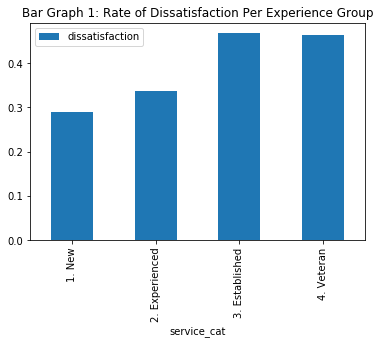

In [49]:
%matplotlib inline
dissatisfaction_service_table.plot(kind='bar', title='Bar Graph 1: Rate of Dissatisfaction Per Experience Group')

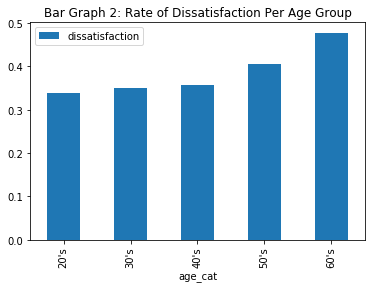

In [50]:
dissatisfaction_age_table = combined_updated.pivot_table(values='dissatisfaction', index='age_cat')
dissatisfaction_age_table.plot(kind='bar', title='Bar Graph 2: Rate of Dissatisfaction Per Age Group')

## Conclusion
After lots of cleaning and engineering of the data, I was able to distill it into workable and easy to read information using bar graphs.

Bar Graph 1 indicates that employees who resigned at a later date where more likely to have done so due to dissatisfaction. Nearly a third of "New" & "Established" employees who resigned reportedly did so due to dissatisfaction, while almost half of "Experienced" & "Veteran" employees did the same.

Bar Graph 2 indicates that older employees who resigned were far more likely to have done so due to dissatisfaction.
The youngest age group, the 20's, reported dissatisfaction as a reason for resignation nearly a third of the time. For each age group, the percent of resignees reporting dissatisfaction increases steadily. The oldest age group, the 60's, reported dissatisfaction as a reason for resignation nearly half of the time.

Further analysis could include using a scatter matrix to compare age, years of service, and rates of dissatisfaction among resignees in one visual representation.